# Multi Document Summarisation based on Statistics and Linguistic treatment.


 + ## Create a list of sentences to be used as nodes in graph.

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from math import sqrt
from nltk.corpus import wordnet as wn
import nltk
import re

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [20]:
                                       
stop = []  

with open("stopwords.txt", "r") as inptr:
    for line in inptr:
        for word in line.split():
            stop.append(word)
            
doc = []  
with open("cnn", "r") as text:
    for line in text:
        doc.append(line.split())

for i in doc:                                   
    for j in i:
        if j in stop:
            i.remove(j)

In [21]:
coll = ['' for x in range(len(doc))]
for line in range(len(doc)):
    for word in range(len(doc[line])):
        #print doc[line][word],
        if len(coll[line]):
            coll[line] = coll[line] + ' ' + doc[line][word]
        else:
            coll[line] = doc[line][word]

* ## Cosine Similiarity.

In [22]:
def cosine_sim(sen1, sen2):
    #sen1 = sen1.strip().split()
    #sen2 = sen2.strip().split()
    #Case Insensitive Cosine Similarity
    count1 = Counter(w.lower() for w in re.findall(r"\w+", sen1))
    count2 = Counter(w.lower() for w in re.findall(r"\w+", sen2))
    intxn = set(count1.keys()) & set(count2.keys())
    num = sum([count1[x] * count2[x] for x in intxn])
    mod1 = sum([count1[x]**2 for x in count1.keys()])
    mod2 = sum([count2[x]**2 for x in count2.keys()])
    den = sqrt(mod1)*sqrt(mod2)
    return float(num)/den

In [23]:
print cosine_sim('yasir Bashir mir is a good boy', 'yasir bashir mir is a good boy' )

1.0


* ## Semantic similarity using wordnet ``path_similarity()`` function


In [24]:
def wordnet_score(wrd1, wrd2):
    try:
        syn1 = wn.synset('%s.n.01' %(wrd1))
        syn2 = wn.synset('%s.n.01' %(wrd2))
    except:
        return None
    return wn.path_similarity(syn1,syn2,simulate_root=False)

#Return Sentence similarities with only nouns in sentences

def semantic_sim(str1, str2):
    text1 = nltk.word_tokenize(str1)
    text2 = nltk.word_tokenize(str2)
    
    sim_score = 0
    iterations = 0 
    for (word1,tag1) in nltk.pos_tag(text1):
        for (word2,tag2) in nltk.pos_tag(text2):
            if tag1.startswith('NN') and tag2.startswith('NN'):
                iterations += 1
                if wordnet_score(word1,word2):
                    sim_score += wordnet_score(word1,word2)
                
    return float(sim_score)/iterations
        

In [25]:
#Look for NN NNP NNS tags (noun tokenisation)
for i in net.nodes():
    for j in net.nodes():
        print '>>>>',i
        print j
        print semantic_sim(i,j)

>>>> workers protesting labor reform bill put forward the government will make easier companies hire fire employees
workers protesting labor reform bill put forward the government will make easier companies hire fire employees
0.107106001637
>>>> workers protesting labor reform bill put forward the government will make easier companies hire fire employees
people now hoarding gas worried it be time supply levels back normal
0.0591082283729
>>>> workers protesting labor reform bill put forward the government will make easier companies hire fire employees
scenes being played across country friday unions called workers step protests have the past week crippled parts france
0.0304812239811
>>>> workers protesting labor reform bill put forward the government will make easier companies hire fire employees
french prime minister manuel valls told local media thursday he be modify of proposals giving hope to french people the protests fuel shortages soon stop
0.0275860549507
>>>> workers protest

* ## Network Graph Generation.

In [10]:
#This is a simple graph for now
#Change this to a multigraph before applying semantic similarity
net = nx.Graph()

In [11]:
net.add_nodes_from(coll)

In [12]:
net.nodes()

['workers protesting labor reform bill put forward the government will make easier companies hire fire employees',
 'people now hoarding gas worried it be time supply levels back normal',
 'scenes being played across country friday unions called workers step protests have the past week crippled parts france',
 'french prime minister manuel valls told local media thursday he be modify of proposals giving hope to french people the protests fuel shortages soon stop',
 'governments argument strict laws that make french workers the protected the world leave companies a difficult position they take new staff',
 'burning tires tear gas clashes riot police ugly scenes come workers strikes all familiar france country constantly to balance culture workers rights a efficient economy',
 'employees oil refineries nuclear power plants some public transportation left in gas stations dry forcing vehicles search well stocked stations causing long lines the pump',
 'governments violent words contempt th

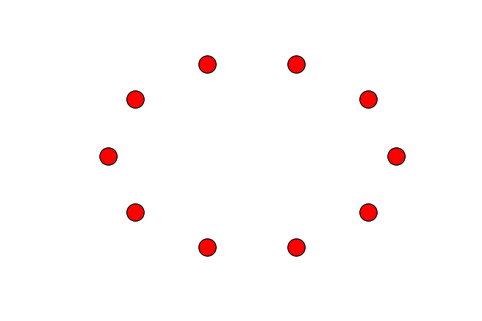

In [25]:
nx.draw_circular(net)

In [26]:
for i in net.nodes():
    for j in net.nodes():
        if (cosine_sim(i,j)):
            net.add_edge(i,j, weight = cosine_sim(i,j))
        print cosine_sim(i,j)


1.0
0.0
0.117851130198
0.0481125224325
0.260643017571
0.0962250448649
0.0962250448649
0.133630620956
0.129099444874
0.200445931434
0.0
1.0
0.0
0.111111111111
0.0
0.0555555555556
0.0555555555556
0.0
0.0
0.0
0.117851130198
0.0
1.0
0.0907218423253
0.147441956155
0.226804605813
0.0453609211627
0.0629940788349
0.304290309725
0.314970394174
0.0481125224325
0.111111111111
0.0907218423253
1.0
0.160514470781
0.037037037037
0.037037037037
0.0514344499874
0.198761598
0.0514344499874
0.260643017571
0.0
0.147441956155
0.160514470781
1.0
0.120385853086
0.0802572353905
0.167183463773
0.215352760823
0.22291128503
0.0962250448649
0.0555555555556
0.226804605813
0.037037037037
0.120385853086
1.0
0.037037037037
0.0
0.0
0.154303349962
0.0962250448649
0.0555555555556
0.0453609211627
0.037037037037
0.0802572353905
0.037037037037
1.0
0.0514344499874
0.1490711985
0.0514344499874
0.133630620956
0.0
0.0629940788349
0.0514344499874
0.167183463773
0.0
0.0514344499874
1.0
0.138013111868
0.142857142857
0.12909944487

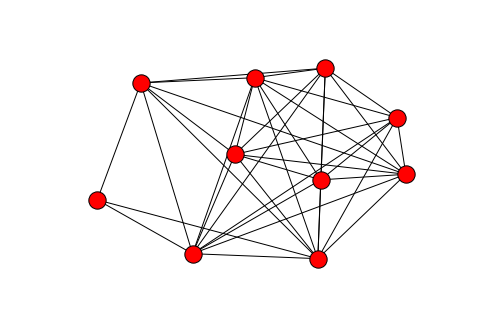

In [28]:
nx.draw(net)

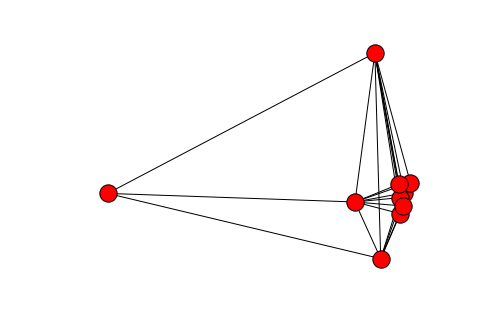

In [29]:
nx.draw_spectral(net)

In [30]:
#Raw code for sentence scoring using semantic similarity

def wordnet_score(wrd1, wrd2):
    try:
        syn1 = wn.synset('%s.n.01' %(wrd1))
        syn2 = wn.synset('%s.n.01' %(wrd2))
    except:
        return None
    return wn.path_similarity(syn1,syn2,simulate_root=False)

    

In [31]:
wn.wup_similarity(dog,cat)

NameError: name 'dog' is not defined

In [32]:
wn.path_similarity(dog,cat)

NameError: name 'dog' is not defined

In [33]:
print(wn.morphy('differentiating', wn.VERB))

differentiate


In [34]:
s1 = 'grape'
s2 = 'Grape'
print wordnet_score(s1,s2)

1.0


In [35]:
nltk.tag.pos_tag(['i', 'am', 'a', 'good', 'boy', 'named', 'adam', 'sandler'])

[('i', 'NN'),
 ('am', 'VBP'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('boy', 'NN'),
 ('named', 'VBN'),
 ('adam', 'JJ'),
 ('sandler', 'NN')]

In [36]:
nltk.tag.pos_tag(['the', 'summer', 'of', 'sixty', 'nine', 'bryan', 'adams'])

[('the', 'DT'),
 ('summer', 'NN'),
 ('of', 'IN'),
 ('sixty', 'JJ'),
 ('nine', 'CD'),
 ('bryan', 'JJ'),
 ('adams', 'NNS')]

In [37]:
text = nltk.word_tokenize("Yasir is cool")
for (a,b) in nltk.pos_tag(text):
      print b


NN
VBZ
JJ


In [38]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [39]:
y = 'yasir'
y.startswith('y')

True

In [40]:
multi_net = nx.MultiGraph()

In [41]:
multi_net.add_nodes_from(coll)

In [42]:
for i in multi_net.nodes():
    for j in multi_net.nodes():
        if (cosine_sim(i,j)):
            multi_net.add_edge(i,j, weight = cosine_sim(i,j), color = 'blue')
        if (semantic_sim(i,j)):
            multi_net.add_edge(i,j, weight = semantic_sim(i,j), color = 'green')

        print cosine_sim(i,j), semantic_sim(i,j)

1.0 0.107106001637
0.0 0.0591082283729
0.117851130198 0.0304812239811
0.0481125224325 0.0275860549507
0.260643017571 0.0343972991294
0.0962250448649 0.0284270779943
0.0962250448649 0.0309761493416
0.133630620956 0.0612729532372
0.129099444874 0.050958474396
0.200445931434 0.0537362984238
0.0 0.0591082283729
1.0 0.211875901876
0.0 0.0427334332334
0.111111111111 0.0517060969334
0.0 0.0459791795506
0.0555555555556 0.0530059470444
0.0555555555556 0.0599888306138
0.0 0.0587493458922
0.0 0.0743429391959
0.0 0.0400359248595
0.117851130198 0.0304812239811
0.0 0.0427334332334
1.0 0.0825111718347
0.0907218423253 0.0247993621055
0.147441956155 0.0294935223507
0.226804605813 0.0366678363115
0.0453609211627 0.0265387920903
0.0629940788349 0.0340356643823
0.304290309725 0.0364853647671
0.314970394174 0.0425287355403
0.0481125224325 0.0275860549507
0.111111111111 0.0517060969334
0.0907218423253 0.0247993621055
1.0 0.0559978818243
0.160514470781 0.0246323301518
0.037037037037 0.0199670598838
0.0370370

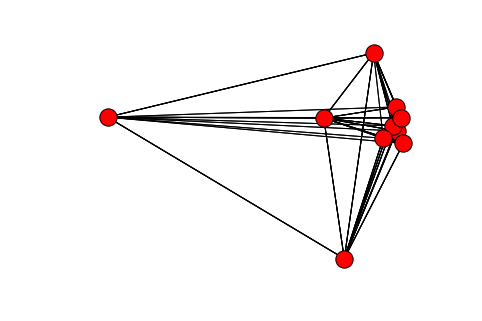

In [43]:
nx.draw_spectral(multi_net)

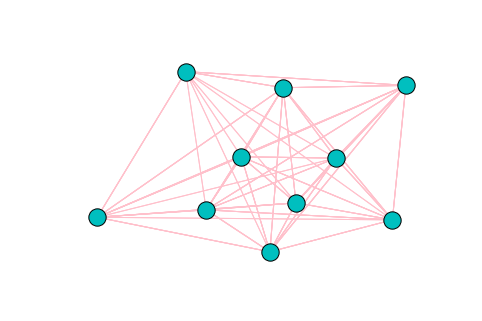

In [45]:
nx.draw(multi_net, node_color='c',edge_color='pink')

In [ ]:
nx.draw_circular(multi_net)

In [ ]:
pos = nx.circular_layout(multi_net)
nx.draw_networkx_nodes(multi_net, pos)
#nx.draw_networkx_edges(multi_net, pos, edge_color='blue')
#nx.draw_networkx_edges(multi_net, pos, edge_color = 'green')
plt.axis('off')
plt.show() 

In [ ]:
import plotly
print plotly.__version__            # version 1.9.4 required
plotly.offline.init_notebook_mode() # run at the start of every notebook
plotly.offline.iplot({
"data": [{
    "x": [1, 2, 3],
    "y": [4, 2, 5]
}],
"layout": {
    "title": "hello world"
}
})

In [ ]:
nx.draw(net, node_color='c',edge_color='pink')

In [ ]:
nx.draw_spectral(net, node_color='c',edge_color='pink')

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *

In [ ]:
def scatter_nodes(pos, labels=None, color=None, size=20, opacity=1):
    # pos is the dict of node positions
    # labels is a list  of labels of len(pos), to be displayed when hovering the mouse over the nodes
    # color is the color for nodes. When it is set as None the Plotly default color is used
    # size is the size of the dots representing the nodes
    #opacity is a value between [0,1] defining the node color opacity
    L=len(pos)
    trace = Scatter(x=[], y=[],  mode='markers', marker=Marker(size=[]))
    for k in range(L):
        trace['x'].append(pos[k][0])
        trace['y'].append(pos[k][1])
    attrib=dict(name='', text=labels , hoverinfo='text', opacity=opacity) # a dict of Plotly node attributes
    trace=dict(trace, **attrib)# concatenate the dict trace and attrib
    trace['marker']['size']=size
    return trace       

In [ ]:
def scatter_edges(G, pos, line_color=None, line_width=1):
    trace = Scatter(x=[], y=[], mode='lines')
    for edge in G.edges():
        trace['x'] += [pos[edge[0]][0],pos[edge[1]][0], None]
        trace['y'] += [pos[edge[0]][1],pos[edge[1]][1], None]  
        trace['hoverinfo']='none'
        trace['line']['width']=line_width
        if line_color is not None: # when it is None a default Plotly color is used
            trace['line']['color']=line_color
    return trace        

In [ ]:
pos=nx.fruchterman_reingold_layout(net)     

In [ ]:


labels=[str(k)  for k in range(len(pos))] # labels are  set as being the nodes indices in the list of nodes
trace1=scatter_edges(net, pos)
trace2=scatter_nodes(pos, labels=labels)

